# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. 

**Задачи**

1. Установить параметры для определения рыночной стоимости объектов недвижимости для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность.
2. Ответить на следующие вопросы:
* Как быстро продавались квартиры?
* Какие факторы больше всего влияют на общую (полную) стоимость объекта?
* Какие населённые пункты имеют самую высокую и низкую стоимость квадратного метра?
* Как стоимость объектов зависит от расстояния до центра города? 

**Импорт необходимых  библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


**Структура проекта:**
- [Описание данных;](#review)
- [Предобработка данных;](#preprocessing)
- [Исследовательский анализ данных.](#analysis)
- [Общий вывод.](#results)

## Описание данных <a id='review'></a>
Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

In [2]:
#Откроем файл с данными, добавим разделитель '\t'
data=pd.read_csv('real_estate_data.csv',sep='\t') 
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [90]:
#основаная информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21897 entries, 0 to 23697
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             21897 non-null  int64         
 1   last_price               21897 non-null  float64       
 2   total_area               21897 non-null  float64       
 3   first_day_exposition     21897 non-null  datetime64[ns]
 4   rooms                    21897 non-null  int64         
 5   ceiling_height           13556 non-null  float64       
 6   floors_total             21832 non-null  float64       
 7   living_area              21897 non-null  float64       
 8   floor                    21897 non-null  int64         
 9   is_apartment             21897 non-null  bool          
 10  studio                   21897 non-null  bool          
 11  open_plan                21897 non-null  bool          
 12  kitchen_area             21897 n

Построим гистограмму для всех числовых столбцов таблицы на одном графике.

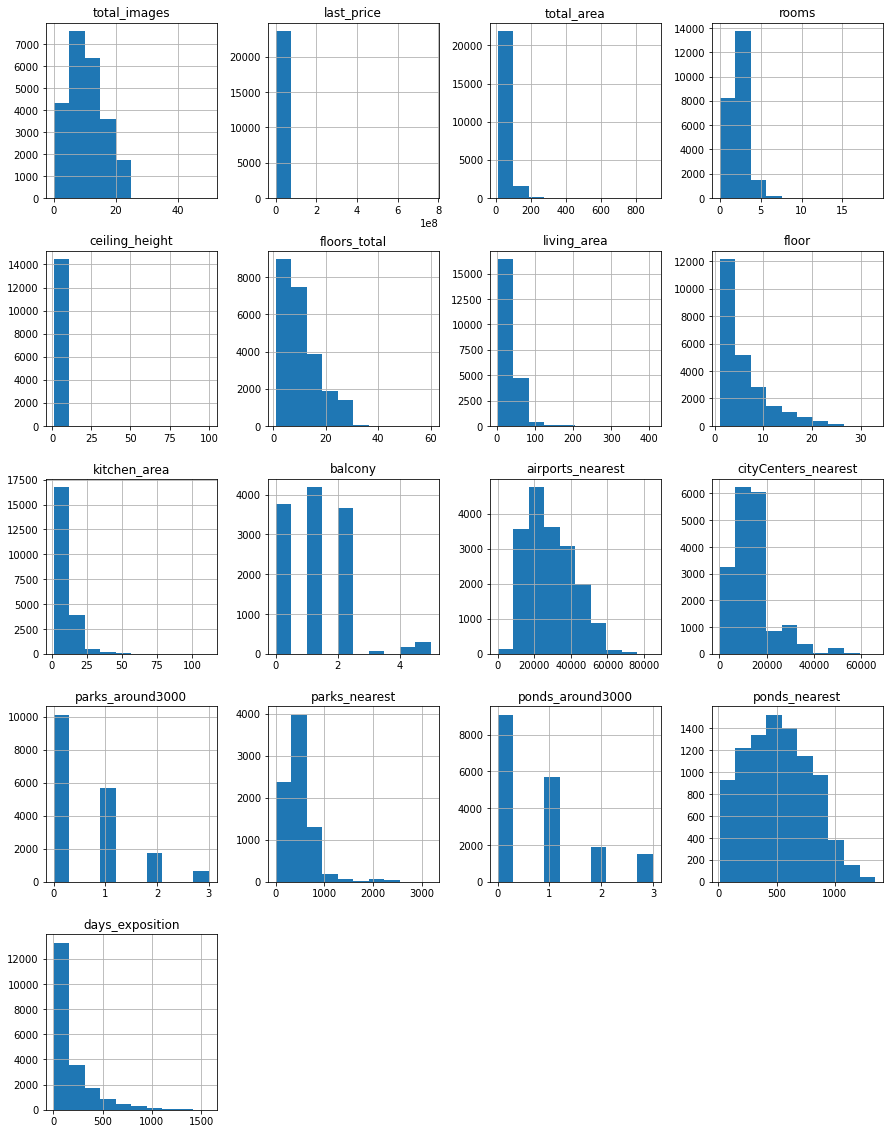

In [4]:
data.hist(figsize=(15, 20))
plt.show()

Посмотрим наименование колонок

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

_______
**Вывод** 

Данные содержат 22 столбца и 23699 строк. Типы данных, представленных в таблице bool(2), float64(14), int64(3) и object(3). Имеются пропущенные значения и типы данных несоответствующие документации. Также в названии колонок присутствует наименование, не соответствующее "хорошему стилю" и не  данные в колонках соответствуют нормальному распределению - имеют выбросы и аномалии.
______

## Предобработка данных <a id='preprocessing'></a>

#### Переименование столбцов
В наименовании столбца `cityCenters_nearest` присутствует заглавная буква и нет змеиного регистра. Исправим это.

In [6]:
data=data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Работа с пропусками:
Определим, в каких столбцах есть пропуски и их количество

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#Всего пропусков в данных
data.isna().sum().sum()

101441

**Пропуски обнаружены в столбцах:**
* `ceiling_height` (9195) — высота потолков (м)
* `floors_total` (86)— всего этажей в доме
* `living_area` (1903)— жилая площадь в квадратных метрах (м²)
* `is_apartment` (20924)— апартаменты (булев тип)
* `kitchen_area` (2278)  — площадь кухни в квадратных метрах (м²)
* `balcony` (11519)— число балконов
* `locality_name` (49)— название населённого пункта
* `airports_nearest` (5542)— расстояние до ближайшего аэропорта в метрах (м)
* `city_centers_nearest` (5519)— расстояние до центра города (м)
* `parks_around3000` (5518)— число парков в радиусе 3 км
* `parks_nearest` (15620)— расстояние до ближайшего парка (м)
* `ponds_around3000` (5518)— число водоёмов в радиусе 3 км
* `ponds_nearest` (14589)— расстояние до ближайшего водоёма (м)
* `days_exposition` (3181)— сколько дней было размещено объявление (от публикации до снятия)


Заполним пропущенные значения там, где это возможно. 

**Пропуски в столбце `is_apartment`**

В столбце довольно большое количество пропусков . Возможно, продавец не указал данный пункт, потому что не был уверен является объект апартаментами или квартирой, поэтому заменим пропуски в столбце 'is_apartment' значением False.

In [9]:
data['is_apartment']=data['is_apartment'].fillna(False)

In [10]:
data['is_apartment'].isna().sum()

0

**Пропуски в столбцах с характеристиками жилого помещения (`ceiling_height`, `floors_total`,`balcony`,`living_area`,`kitchen_area`,`balcony`)**

Пропуски в  столбце `balcony` могли возникнуть из-за того, что в квартире просто нет балкона. Поэтому заменим пропуски на 0

In [11]:
data['balcony']=data['balcony'].fillna(0)

In [12]:
data['balcony'].isna().sum()

0

Пропуски в столбце `living_area`

Найдем среднюю долю площади жилого помещения от общей площади для всех объектов и заменим пропуски этим значением умноженным на общую площадь

In [13]:
data['living_area_share'] = data['living_area']/data['total_area']
living_area_share_mean = data['living_area_share'].mean()
data['living_area'] = data['living_area'].fillna(living_area_share_mean*data['total_area'])

Аналогично поступим с пропусками в столбце `kitchen_area`

In [14]:
data['kitchen_area_share'] = data['kitchen_area']/data['total_area']
kitchen_area_share_mean = data['kitchen_area_share'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_share_mean*data['total_area'])

Пропуски таких характеристик как высота потолков, количество этажей в доме, заполнить невозможно. Пока оставим пропуски до исследовательского анализа данных. 

**Пропуски в столбцах с картографическими данными (`locality_name`,`airports_nearest`, '`cityCenters_nearest`, `parks_around3000`, `parks_nearest` `ponds_around3000`, `ponds_nearest`)**

Сначала разберемся с парками. В датасете есть два столбца, один число парков в радиусе 3 км и расстояние до ближайшего парка (м).

In [15]:
#посмотрим уникальные значения в столбце с числом парков в радиусе 3км
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [16]:
#Посмотрим какое максимальное расстояние до ближайшего парка
max(data['parks_nearest'])

3190.0

Сделать замену возможно только в случае, когда ближайших парков в округе нет, то есть в столбце `parks_around3000` - 0, а в `parks_nearest` пропуск. Соответственно расстояние до ближайшего парка заменим на 0

In [17]:
data.query('(parks_nearest.isna()) & (parks_around3000==0)')[['parks_nearest','parks_around3000']]

,parks_nearest,parks_around3000
1,NaN,0.0
6,NaN,0.0
7,NaN,0.0
9,NaN,0.0
11,NaN,0.0
...,...,...
23684,NaN,0.0
23685,NaN,0.0
23687,NaN,0.0
23688,NaN,0.0


In [18]:
data['parks_nearest'] = data[data['parks_around3000']==0].fillna(0)
data.query('(parks_nearest.isna()) & (parks_around3000==0)')[['parks_nearest','parks_around3000']]

,parks_nearest,parks_around3000


Все остальные пропуски оставим для дальнейшего анализа

Тоже самое проделаем с расстоянием до водоемов.

In [19]:
data.query('(ponds_nearest.isna()) & (ponds_around3000==0)')[['ponds_nearest','ponds_around3000']]

,ponds_nearest,ponds_around3000
1,NaN,0.0
6,NaN,0.0
7,NaN,0.0
9,NaN,0.0
11,NaN,0.0
...,...,...
23684,NaN,0.0
23685,NaN,0.0
23687,NaN,0.0
23688,NaN,0.0


In [20]:
data['ponds_nearest'] = data[data['ponds_around3000']==0].fillna(0)
data.query('(ponds_nearest.isna()) & (ponds_around3000==0)')[['ponds_nearest','ponds_around3000']]

,ponds_nearest,ponds_around3000


Остальные картографические характеристики оставим без изменений, так как мы не знаем адресов квартир, и не можем определить расстояния и наименования населенных пунктов. 

**Пропуски в столбце `days_exposition`**
Пропуски в данном столбце могут быть из-за того, что объявление еще не снято с публикации. Заменять или удалять пропуски не будем. 

In [21]:
data.isna().sum().sort_values(ascending = False)

ponds_nearest           14628
parks_nearest           13593
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area_share       2278
living_area_share        1903
floors_total               86
locality_name              49
balcony                     0
total_images                0
last_price                  0
open_plan                   0
studio                      0
is_apartment                0
floor                       0
living_area                 0
rooms                       0
first_day_exposition        0
total_area                  0
kitchen_area                0
dtype: int64

In [22]:
data.isna().sum().sum()

67010

Осталось большое количество пропусков в столбцах с данными о высоте потолков, количеством дней сколько было размещено объявление, расстоянии до парков и других картографических данных о расстояниях до центра города, аэродромов и водоемов. Количество пропусков в столбцах с количеством этажей и наименованием населенного пункта незначительно.

**Причинами пропусков** в данных о характеристиках квартир, скорее всего, является человеческий фактор - владельцы просто не ввели данные при заполнении анкеты. Пропуски в столбце с количеством дней размещения объявления связано с тем, что квартира еще не продана. Пропуски в картографических данных могут быть обусловлены тем, что владельцы не указали адрес и автоматически рассчитать данные для этих столбцов не получилось, либо данных объектов в городе нет. 

#### Типы данных

Исходя из документации значения в столбцах должны соответствовать следующим типам:
* `is_apartment`,`open_plan`,`studio` - bool
* `first_day_exposition` - datetime64
* `locality_name`- object 
* Остальные столбцы  в числовых типах int64 или float64  

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Неподходящий тип данных в столбцах  `first_day_exposition`, `ponds_nearest` ,`parks_nearest` и `balcony`

In [24]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data['ponds_nearest']=data['ponds_nearest'].astype('float')
data['parks_nearest']=data['parks_nearest'].astype('float')
data['balcony']=data['balcony'].astype('int')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Изменение типов данных необходимо для дальнейшего анализа. Так со столбцами, содержащими строковые значения вместо числовых, невозможно произвести арифметических действий, тоже самое при работе с датами и временем.

#### Поиск неявных дубликатов
Изучим уникальные значения в столбце с названиями населенных пунктов.

In [26]:
data['locality_name'].sort_values().unique().tolist()

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [27]:
data['locality_name'].nunique()

364

Найдено 364 уникальных наименования. Заменим во всех наименованиях букву ё на е, а также удалим все разновидности населенных пунктов, оставив только название.

In [28]:
data['locality_name'] = (
    data['locality_name']
    .replace('ё','е',regex=True))

locality_name=['поселок ',
               'станции ',
               'городской ',
               'коттеджный ',
               'городского типа ',
               'при железнодорожной ',
               'станции ', 
               'село ',
               'садовое товарищество ',
               'садоводческое некоммерческое товарищество ',
              'деревня ',
              'имени ']
data['locality_name'] = (
    data['locality_name']
    .replace(locality_name, '',regex=True))   

data['locality_name'].nunique()


305

После замены неявных дубликатов осталось 305 уникальных наименований.

#### Добавление в таблицу новых столбцов

Добавим в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра (точность до двух знаков после запятой);
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (точность до ближайших целых значений).

In [29]:
#цена одного квадратного метра;
data['sqm_price']=data['last_price']/data['total_area']
data['sqm_price']=round(data['sqm_price'],2)

In [30]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday']=data['first_day_exposition'].dt.weekday

In [31]:
#месяц публикации объявления;
data['month']=data['first_day_exposition'].dt.month

In [32]:
#*год публикации объявления;
data['year']=data['first_day_exposition'].dt.year

In [33]:
#тип этажа квартиры (значения — «первый», «последний», «другой»);
list=[]
def floors_type_account(floors_total,floor):
        if floor==1:
            return 'первый'
        elif floor==floors_total:
            return 'последний'
        else:
            return 'другой'
            
for g in range(data.shape[0]):
    list.append(floors_type_account(data['floors_total'][g],data['floor'][g]))
    
data['floor_type']=pd.Series(list)

In [34]:
#расстояние до центра города в километрах.
data['city_сenters_nearest_km']=round(data['city_centers_nearest']/1000,0)

_________
**Вывод**
* В ходе предобработки данных был переименован столбец с расстоянием до центра города (city_Centers_nearest) 
* Были выявлены и заполнены пропуски в значениях там, где это было возможно
* Заменены типы данных там, где это было необходимо
* Исправлены неявные дубликаты в столбце с  названиями населенных пунктов 
* В таблицу были добавлены новые столбцы 
_______

### Исследовательский анализ данных <a id='analysis'></a>
#### Устранение аномалий

Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. Обработаем аномалии в столбцах, если они есть. 

Список параметров:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка


In [35]:
#сохраним в переменной общее количество строк датафрейма
general_shape = data.shape[0]

In [36]:
#Функция для автоматизации построения графиков по параметрам
def graph(table , column  ):
        try:
            plt.figure(figsize=(10,7))
            plt.title(column)
            table[column].hist(bins=50 )
            plt.show()
            
            plt.figure(figsize=(7,10))
            plt.title(column)
            table[[column]].boxplot()
            plt.show()

            print(table[column].describe())
            quan1=table[column].quantile(0.25)
            quan3=table[column].quantile(0.75)
            iqr=quan3-quan1
            bottom = table[table[column] < quan1-(1.5*iqr)][column].count()
            top = table[table[column] > quan3+(1.5*iqr)][column].count()
            if quan1-(1.5*iqr) < 0:
                print( f'Размах "усов"  от: {min(table[column])} до: {quan3+(1.5*iqr):.2f}' )
            else:
                print( f'Размах "усов"  от: {quan1-(1.5*iqr):.2f} до: {quan3+(1.5*iqr):.2f}' )
                
            print(f'Доля выбросов по нижней границе:{bottom/general_shape:.2%}' )
            print(f'Доля выбросов по верхней границе:{top/general_shape:.2%}' )
        except:
            print(table[column].describe())

In [37]:
# Функция для удаления строк и построения новых диаграмм
def drop_lines(table ,column, mini, maxi):
    index=table[((table[column]<mini ) | (table[column]>maxi)) & ~(table[column].isna())].index.tolist()
    table.drop(labels =index, axis = 0,inplace = True )
    graph(table , column  )

In [38]:
#Функция для проверки количества удаленных значений 
def check(data):
    print(f'Удалено: {(general_shape - data.shape[0])/general_shape :.2%} от общей выборки')

Построим гистограммы и диаграммы размаха для каждого параметра, для выявления "подозрительных значений" и выбросов.

##### Высота потолков


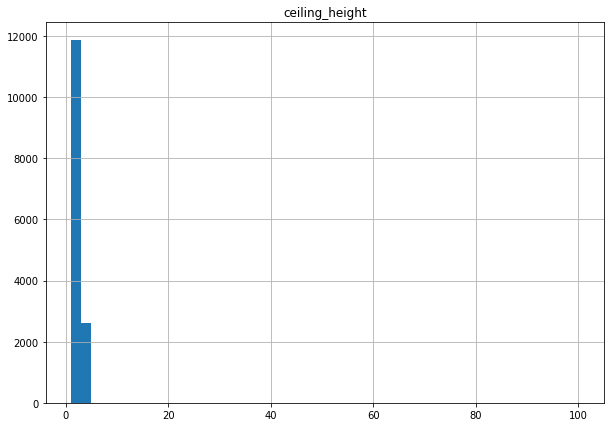

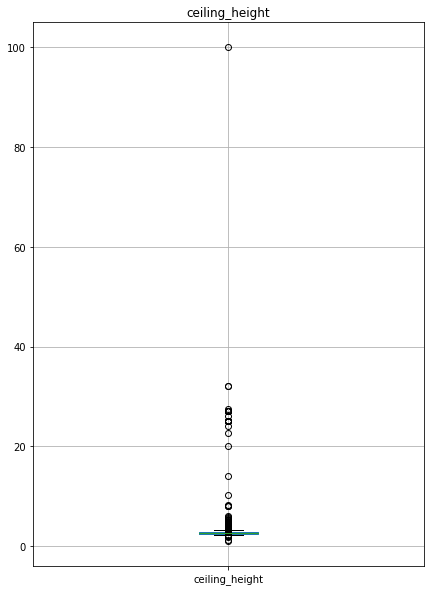

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
Размах "усов"  от: 2.10 до: 3.22
Доля выбросов по нижней границе:0.06%
Доля выбросов по верхней границе:3.43%


In [39]:
graph(data,'ceiling_height')

В датасете встречаются значения высоты потолков более 20 м. Это явная ошибка в записи данных. Разделим эти значения на 10.

In [40]:
anomaly_ceiling_height= data.query('ceiling_height>=20')['ceiling_height'].tolist()

for h in range(len(anomaly_ceiling_height)):
    data['ceiling_height'] = (
    data['ceiling_height']
    .replace(anomaly_ceiling_height[h], anomaly_ceiling_height[h]/10,regex=True))


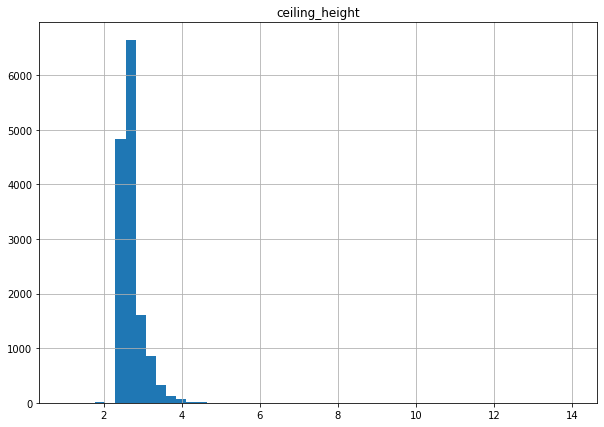

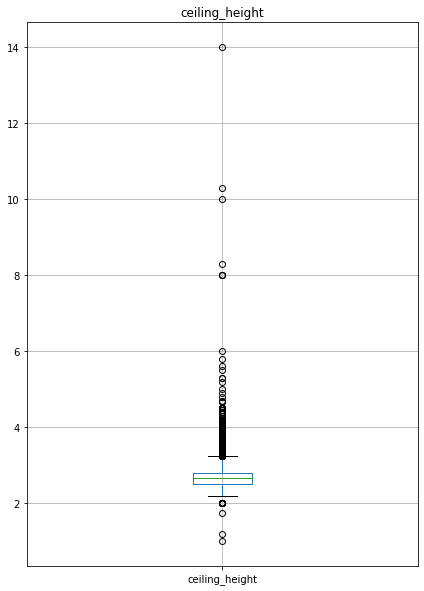

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64
Размах "усов"  от: 2.07 до: 3.23
Доля выбросов по нижней границе:0.06%
Доля выбросов по верхней границе:3.31%


In [41]:
graph(data,'ceiling_height')

В выборке все еще встречаются выбросы. Исключим из данных квартиры с потолками менее 2,5 м. (так как это значение является официальным санитарно-гигиеническим требованием для жилых помещений), и исключим из данных единичные выбросы со значениями более 5 м

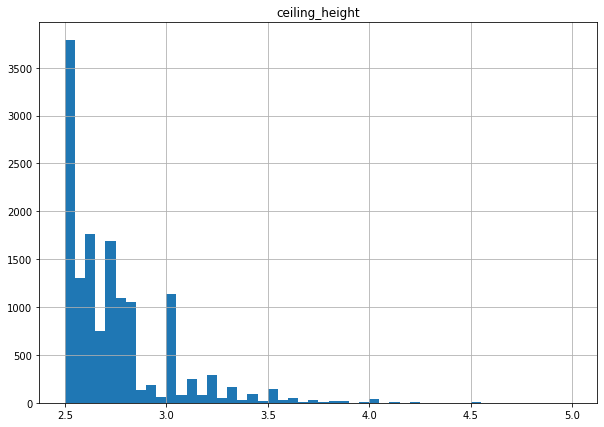

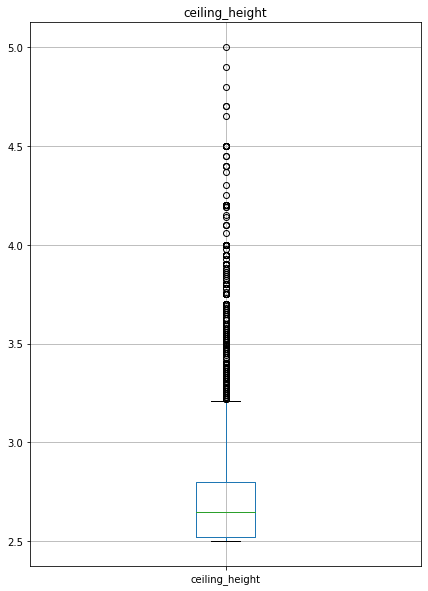

count    14414.000000
mean         2.727190
std          0.270902
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64
Размах "усов"  от: 2.10 до: 3.22
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:3.28%


In [42]:
drop_lines(data,'ceiling_height',2.5,5)

In [43]:
check(data)

Удалено: 0.38% от общей выборки


**Вывод**
________
Было очищено 0,38% выбросов со значениями менее `2,5` и более `5 м`. 

По графикам видно, что наибольшее количество квартир имеют потолки высотой потолков от 2,5 до 2,8 м — это стандартная высота для "хрущевок". Оставили в данных выбросы, выходящие за пределы общего распределения  до значений в 5 м, их от общего числа данных более 3%. 

В Санкт-Петербурге очень много исторической застройки, "сталинок" с высокими потолками и новостроек, так что удаление всех выбросов может сильно сказаться на выборке.
_______

##### Общая площадь


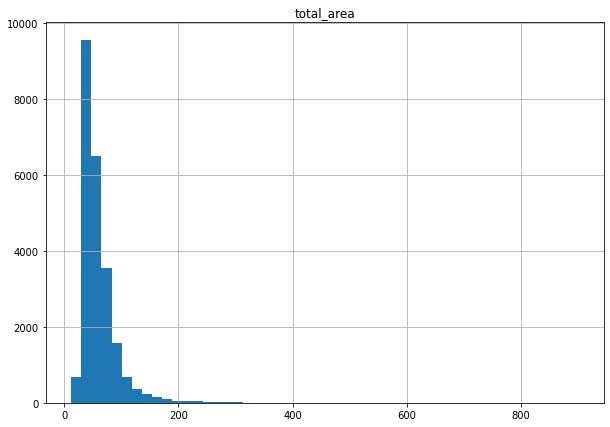

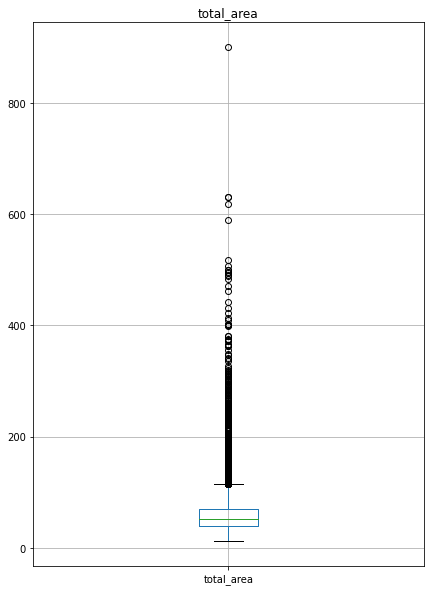

count    23609.000000
mean        60.347139
std         35.556255
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64
Размах "усов"  от: 12.0 до: 115.00
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:5.11%


In [44]:
graph(data,'total_area')

По гистограмме видно, что основной пик приходится на значение площади около 60 м², таких квартир в наборе данных более 9000. 
Очень мало значений с площадями квартир более 250 м². Присутствует выброс в виде одной квартиры в 900 м². Удалим из данных квартиры со значениями более 250 м². 

In [45]:
#посмотрим, квартир с какой площадью в выборке менее 250 шт. (1%)
for i in range(50):
    if data[data['total_area']<i]['total_area'].count()>=250:
        break 
print(i)

26


Минимальное значение площади квартиры 12 м². Это слишком маленькая площадь. Так же очень малое количество квартир с площадью менее 26 м². Удалим эти значения, тем более, что региональный стандарт нормативной площади однокомнатной квартиры в Санкт-Петербурге 28-38 м²

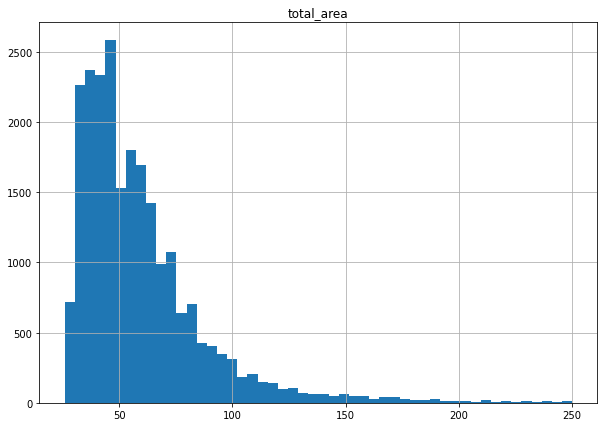

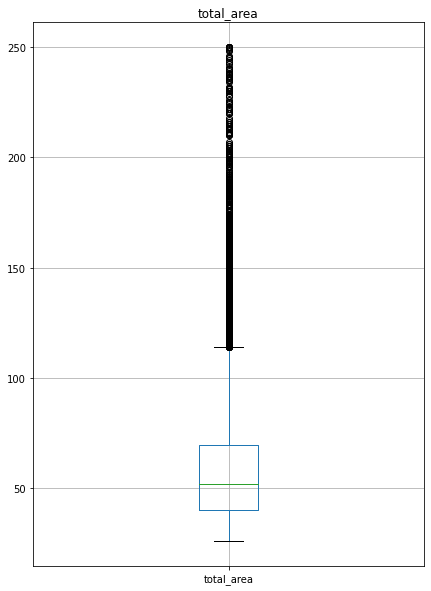

count    23238.000000
mean        59.422720
std         28.814817
min         26.000000
25%         40.300000
50%         52.000000
75%         69.800000
max        250.000000
Name: total_area, dtype: float64
Размах "усов"  от: 26.0 до: 114.05
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:4.81%


In [46]:
drop_lines(data,'total_area',26,250)

<AxesSubplot:>

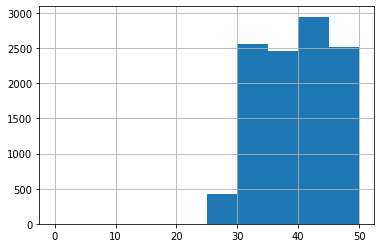

In [47]:
data['total_area'].hist(range=(0,50))

In [48]:
check(data)

Удалено: 1.95% от общей выборки


**Вывод**
_________
Были удалены квартиры с площадью менее 26 м², так как их в общей выборе менее 1% и  квартиры с площадью более 250 м². 

По графикам можем сказать, что наиболее часто встречаются квартиры с площадями от `30 до 50 м²`, квартиры с площадью более 114 м² очень редки их в выборке около 5%.
_________

##### Жилая площадь


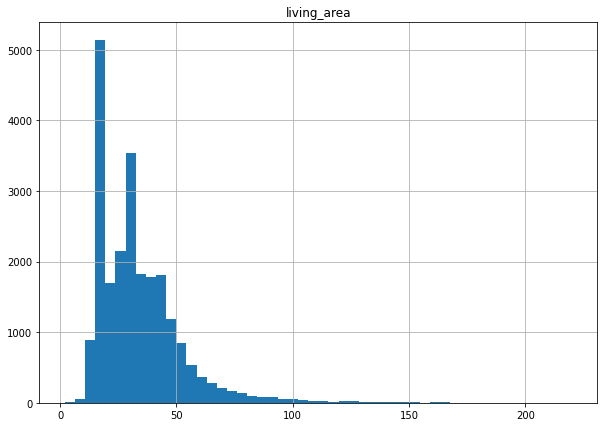

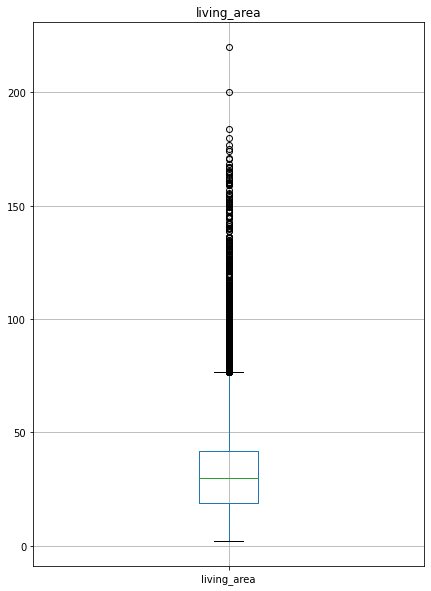

count    23238.000000
mean        34.004201
std         18.824492
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        220.000000
Name: living_area, dtype: float64
Размах "усов"  от: 2.0 до: 76.50
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:3.28%


In [49]:
graph(data,'living_area')

Минимальное значение жилой площади 2 м², что невозможно. На гистограмме также видны минимумы у значений площадей менее 15 м². 

Ранее мы рассчитывали средний коэффициент для доли жилой площади (livind_area_share_mean). Умножим его на минимальное значение общей площади квартиры, которое мы приняли в предыдущем шаге в 26м².

In [50]:
display(living_area_share_mean*26)
data[data['living_area']<living_area_share_mean*26]['living_area']

14.683903564182408

5        14.40
6        10.60
34       14.00
54       14.00
101      12.00
         ...  
23573    13.59
23574     3.00
23640    14.60
23658    14.00
23698    12.30
Name: living_area, Length: 574, dtype: float64

Примем минимальную жилую площадь за 14,68 м², тем более квартир с меньшей площадью  в выборке менее 3%. Верхнюю границу среза трогать не будем и оставим максимальное значение в 220 м²

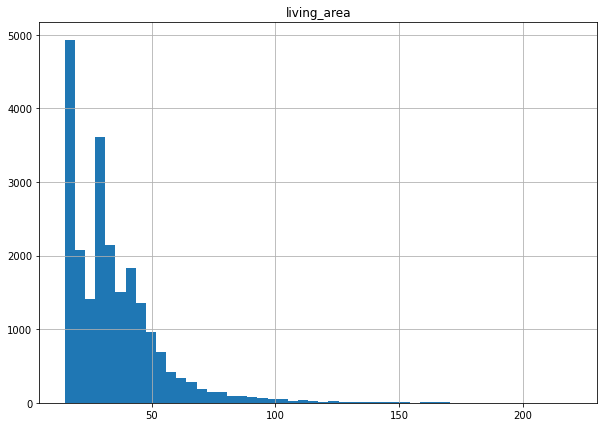

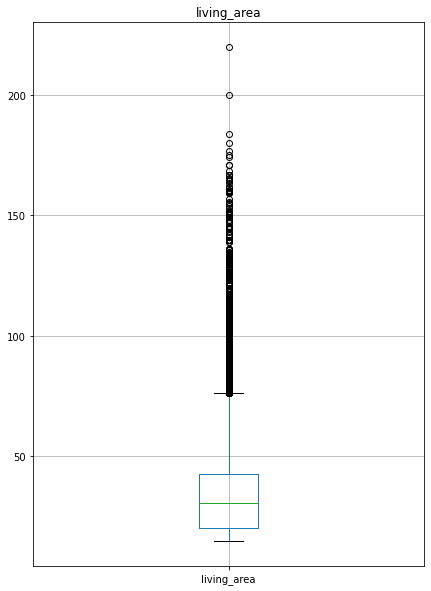

count    22664.000000
mean        34.534427
std         18.758378
min         14.683904
25%         20.000000
50%         30.497338
75%         42.500000
max        220.000000
Name: living_area, dtype: float64
Размах "усов"  от: 14.683903564182408 до: 76.25
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:3.33%


In [51]:
drop_lines(data,'living_area',14.68,220)

In [52]:
check(data)

Удалено: 4.37% от общей выборки


<AxesSubplot:>

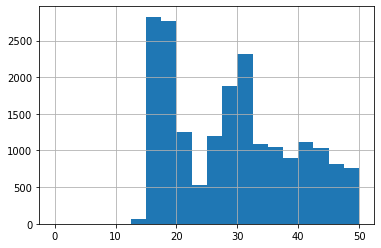

In [53]:
data['living_area'].hist(bins=20,range= (0,50))

**Вывод**
_____
Были удалены данные о квартирах с площадью менее 14,68 м².

По графикам видно, что в среднем квартиры имеют жилую площадь от 20 до 42 м². Пики на гистограмме обнаруживаются у значений в 15, 20 и 30 м²
_________

##### Площадь кухни


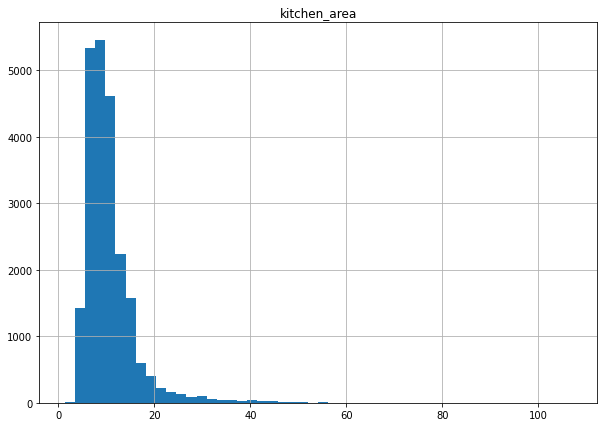

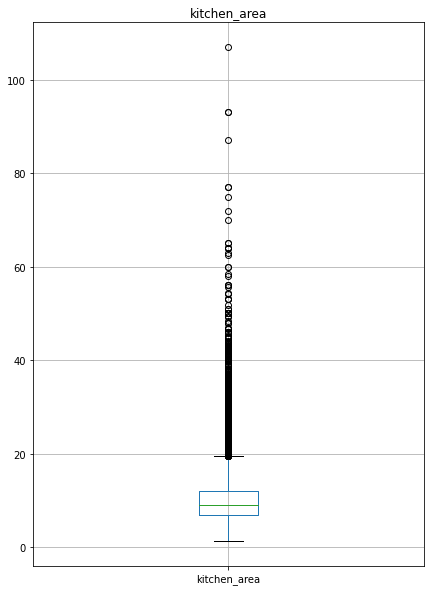

count    22664.000000
mean        10.480769
std          5.591000
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64
Размах "усов"  от: 1.3 до: 19.50
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:5.05%


In [54]:
graph(data,'kitchen_area')

По санитарным нормам минимальная площадь кухни 8 м² для квартиры и 5 м² для выделенной зоны кухни-ниши  . Так же удалим единичные выбросы более 80 м²

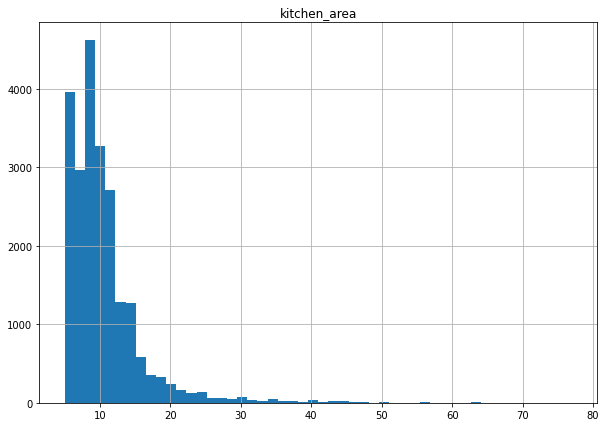

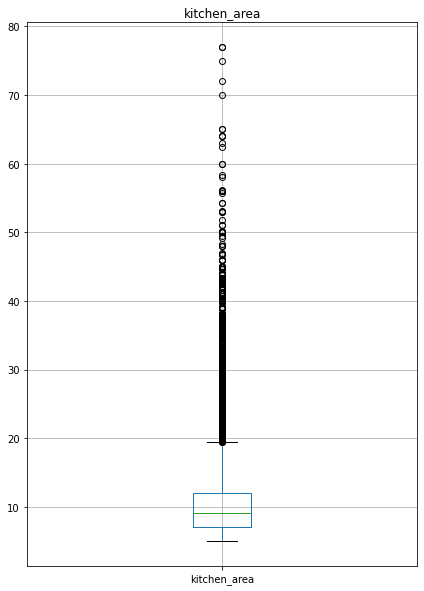

count    22546.000000
mean        10.496680
std          5.472766
min          5.000000
25%          7.000000
50%          9.100000
75%         12.000000
max         77.000000
Name: kitchen_area, dtype: float64
Размах "усов"  от: 5.0 до: 19.50
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:5.03%


In [55]:
drop_lines(data,'kitchen_area',5,80)

<AxesSubplot:>

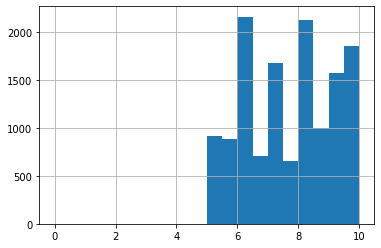

In [56]:
data['kitchen_area'].hist(bins=20,range=(0,10))

In [57]:
check(data)

Удалено: 4.87% от общей выборки


**Вывод**
__________
Срез данных по площадям кухонь был сделан по значениям от 5 до 80 м².

В среднем площади кухонь варьируются от 7 до 12 м², наибольшее количество квартир имеют кухни с площадями в 6 м² и 8 м².
_____________

#####  Цена объекта


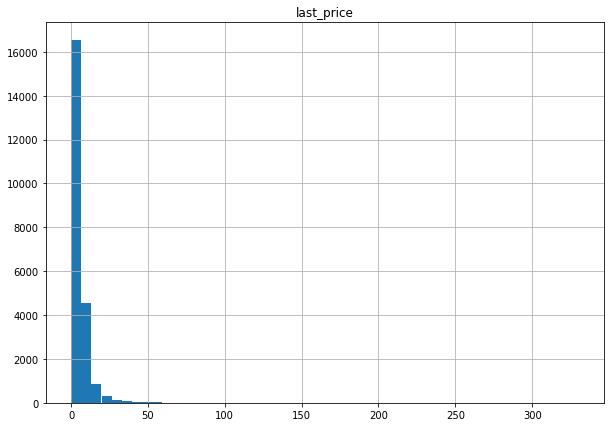

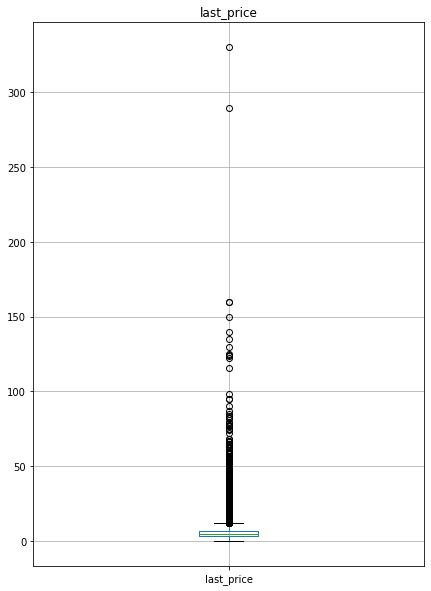

count    22546.000000
mean         6.297236
std          7.074833
min          0.012190
25%          3.500000
50%          4.700000
75%          6.850000
max        330.000000
Name: last_price, dtype: float64
Размах "усов"  от: 0.01219 до: 11.88
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:8.18%


In [58]:
#разделим значение в столбце last_price на 1млн, для наглядности
data['last_price'] = data['last_price']/1000000
graph(data,'last_price')

В данных обнаружено очень большое количество выбросов. Выходящих за область "усов" диаграммы размаха значений более 8%. 

Стоимость квартиры в 12190 рублей, выглядит совсем неправдоподобно. Проверим выборку, по условию стоимости менее 500тыс. рублей.

In [59]:
data[data['last_price']<0.5]['last_price']

5698     0.45000
6859     0.49000
8793     0.01219
9581     0.45000
10782    0.49000
14911    0.43000
16032    0.48000
16219    0.45000
16274    0.44000
17456    0.43000
17676    0.45000
18867    0.47000
21912    0.47000
23484    0.47000
Name: last_price, dtype: float64

Значение в 12190 рублей единственное в выборке, поэтому при удалении выбросов поставим нижний предел в 400 000 рублей.

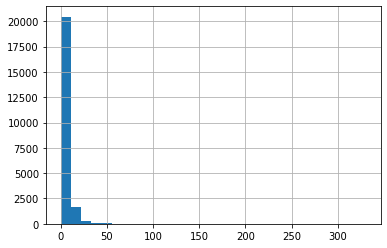

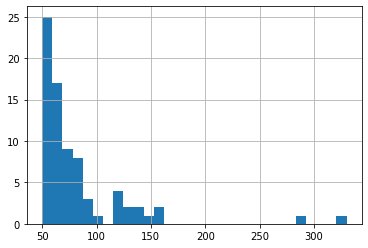

In [60]:
data['last_price'].hist(bins=30,range=(0.4,330))
plt.show()
data['last_price'].hist(bins=30,range=(50,330))
plt.show()

Квартир со стоимостью более 50 млн.руб. в выборке менее 25. Поэтому примем это значения за верхний предел среза.

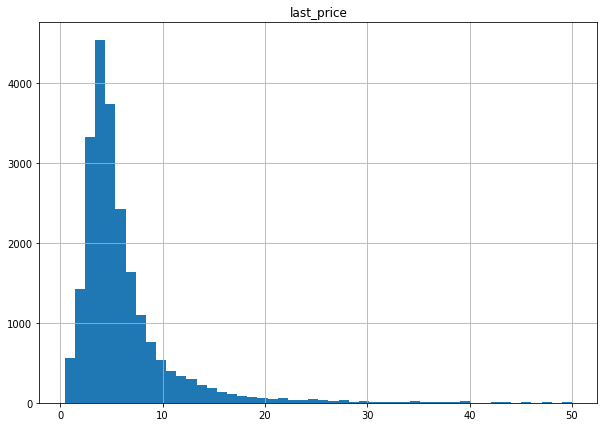

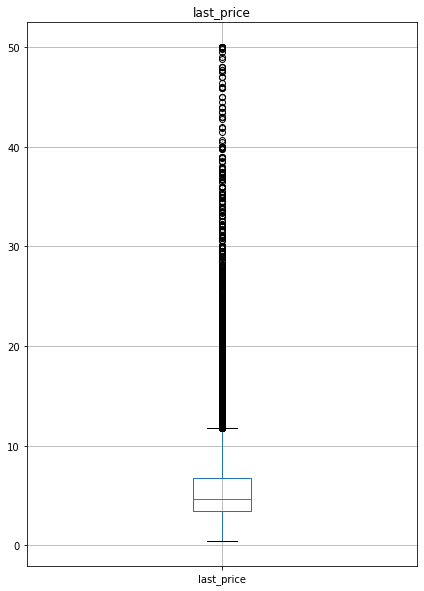

count    22475.000000
mean         6.051595
std          4.871070
min          0.430000
25%          3.500000
50%          4.700000
75%          6.800000
max         50.000000
Name: last_price, dtype: float64
Размах "усов"  от: 0.43 до: 11.75
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:7.99%


In [61]:
drop_lines(data,'last_price',0.4, 50)

<AxesSubplot:>

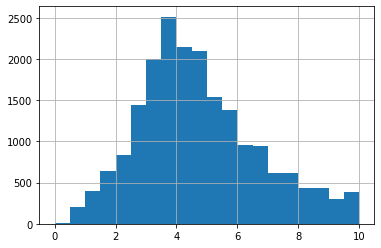

In [62]:
data['last_price'].hist(bins=20,range=(0,10))

In [63]:
check(data)

Удалено: 5.16% от общей выборки


**Вывод**
_____
В данных обнаружено очень большое количество выбросов, выходящих за область "усов" диаграммы размаха. Это связано с большой неоднородностью выборки так как в данных присутствуют квартиры расположенные и в историческом центре города, и в области, с большим количеством комнат и коммуналки, чистить все выбросы было бы неправильно. 

Были удалены квартиры стоимостью менее 400тыс. руб., и более 50 млн - этих значений в данных менее 1%.

По графикам видно, что наиболее часто можно встретить квартиры со стоимостью около 4-5 млн. руб.
_________

##### Количество комнат


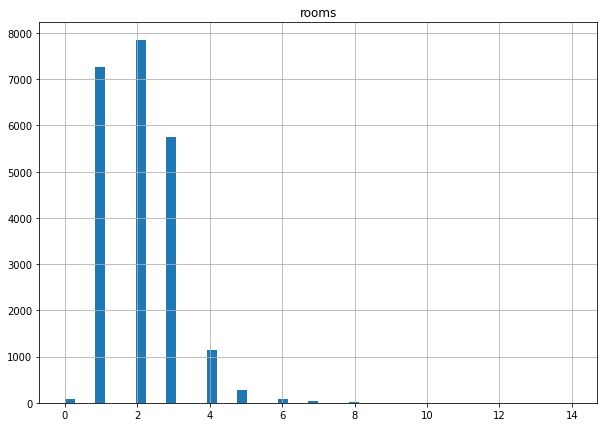

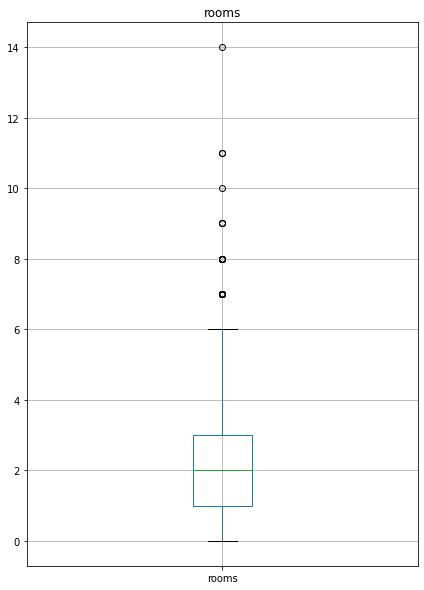

count    22475.000000
mean         2.090679
std          1.016400
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64
Размах "усов"  от: 0 до: 6.00
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:0.21%


In [64]:
graph(data,'rooms')

In [65]:
#Отдельно удалим строки со 0 комнатами, которые не являются студиями
display(data[(data['rooms']==0) & (data['studio']==False)]['studio'].count())
index=data[(data['rooms']==0) & (data['studio']==False)]['studio'].index.tolist()
data.drop(labels =index, axis = 0,inplace = True )

28

Удалим из выборки строки со значением более 6 комнат, так как таких квартир всего  6

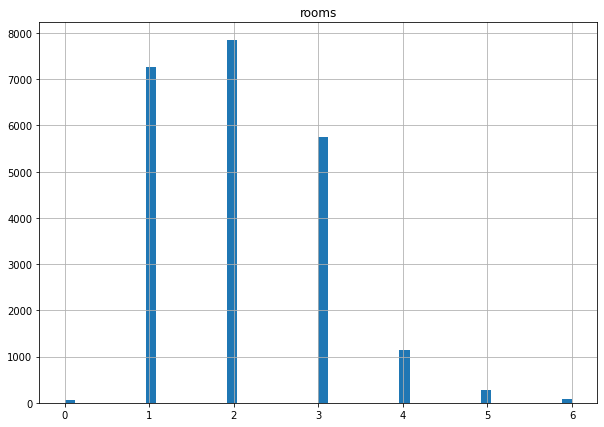

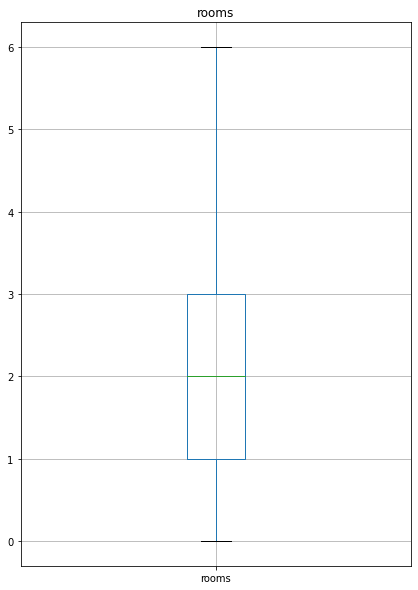

count    22397.000000
mean         2.080948
std          0.979205
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64
Размах "усов"  от: 0 до: 6.00
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:0.00%


In [66]:
drop_lines(data,'rooms',0,6)

In [67]:
check(data)

Удалено: 5.49% от общей выборки


**Вывод**
_____
Были удалены квартиры с 7 комнатами и более, так как их количество в выборке не значительно. Так же были удалены квартиры с 0 комнатами, не являющиеся студиями (всего таких значений в выборке было 28, что несильно повлияет на дальнейший анализ)

Больше всего квартир с 1,2 и 3 комнатами, что вполне логично.
______

##### Тип этажа квартиры


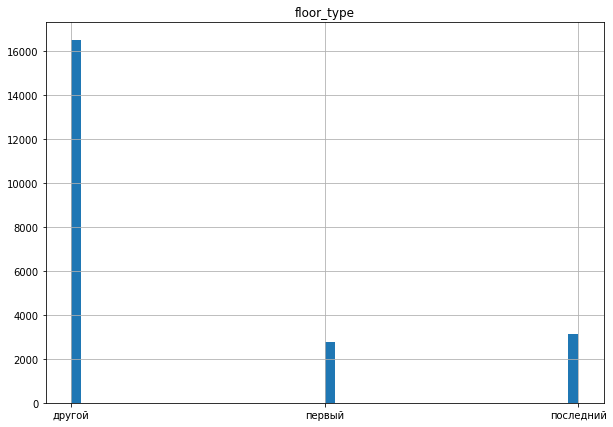

count      22397
unique         3
top       другой
freq       16483
Name: floor_type, dtype: object


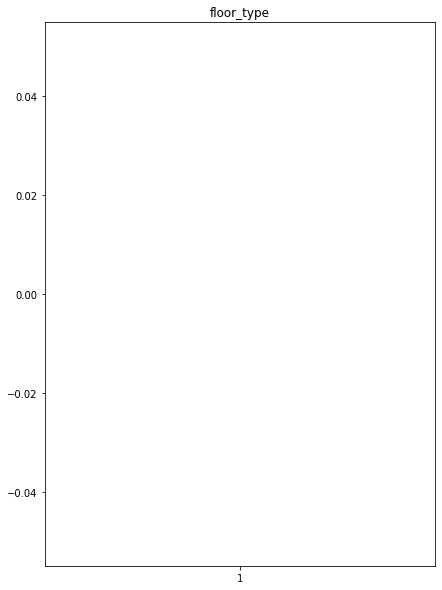

In [68]:
graph(data,'floor_type')

**Вывод**
_________
Наибольшее колличество, продаваемых квартир, находятся на этажах типа "другой"  (от 2 до предпоследнего)
_____

##### Общее количество этажей в доме


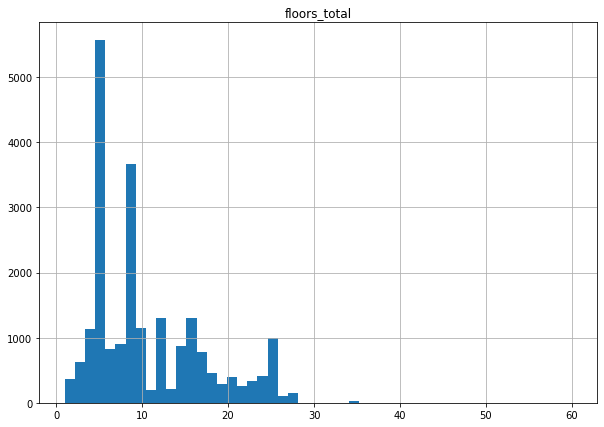

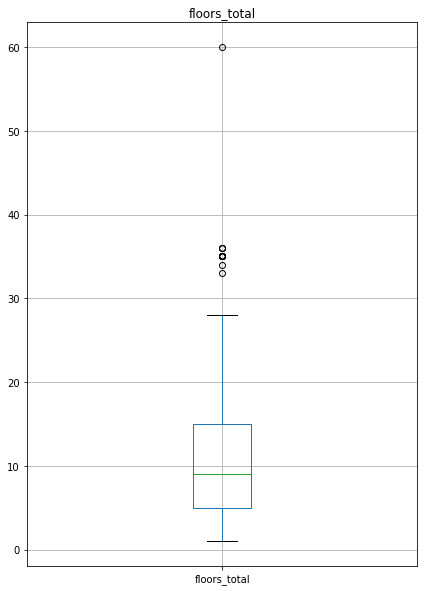

count    22329.000000
mean        10.564065
std          6.501780
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64
Размах "усов"  от: 1.0 до: 30.00
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:0.11%


In [69]:
graph(data,'floors_total')

Удалим отдельные  выбросы со значениями более 30 этажей, так как их в датасете всего 5. 

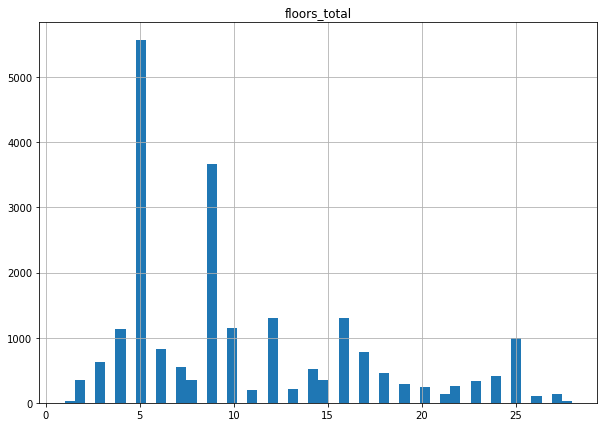

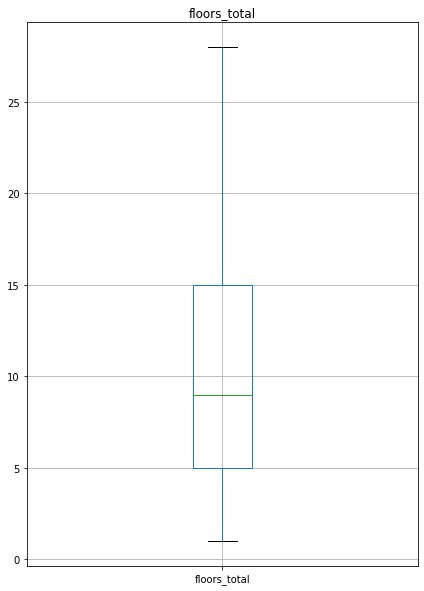

count    22303.000000
mean        10.534457
std          6.445328
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         28.000000
Name: floors_total, dtype: float64
Размах "усов"  от: 1.0 до: 30.00
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:0.00%


In [70]:
drop_lines(data,'floors_total',1,30)

In [71]:
check(data)

Удалено: 5.60% от общей выборки


**Вывод**
_______
Общее количество этажей было отфильтровано по верхней границе в 30 этажей. 

В среднем дома имеют от 5 до 16 этажей. Наиболее частотное значение в 5 этажей, что логично, ведь это самая распространенная серия "хрущевок". Они присутствуют как в центре, так и на окраинах города.
_______

##### Расстояние до центра города в метрах


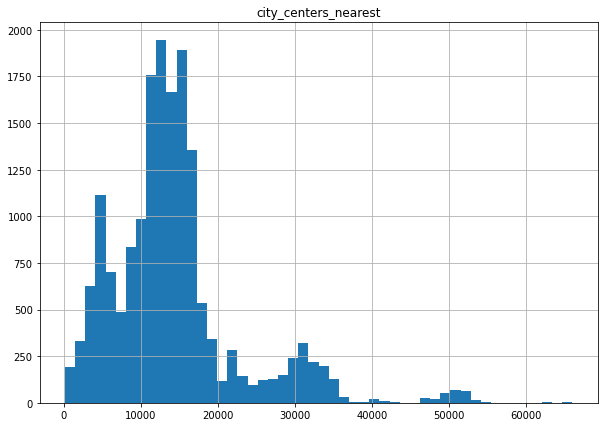

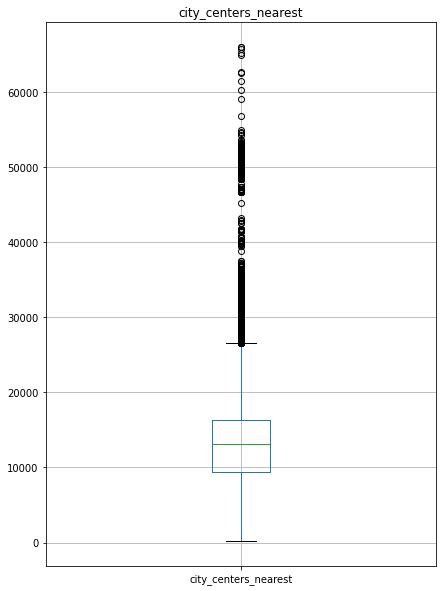

count    17240.000000
mean     14247.952726
std       8593.272568
min        181.000000
25%       9421.750000
50%      13123.000000
75%      16266.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64
Размах "усов"  от: 181.0 до: 26532.38
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:7.22%


In [72]:
graph(data,'city_centers_nearest')

Удалять данные в этом столбце не будем, так как нам важно оценить всю выборку квартир в черте города и в Ленинградской области. 

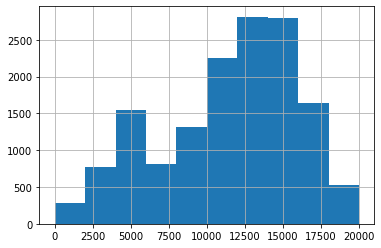

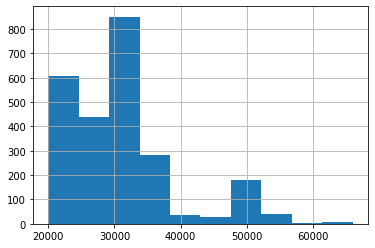

In [73]:
data['city_centers_nearest'].hist(range=(0,20000))
plt.show()
data['city_centers_nearest'].hist(range=(20000,66000))
plt.show()

**Вывод**
___________
По гистограммам видно, что большее количество продаваемых квартир расположены в радиусе 5км и 12,5-17,5 км от центра города. 

Это можно объяснить тем, что в радиусе 5км расположены самые популярные спальные районы в черте города (например, у станций  метро Лесная и Черная речка, Новочеркасская, Ладожская, Московский район, и западная часть Васильевского острова). В радиусе 12,5-17,5 км районы с большим количеством многоэтажных новостроек (Мурино, Парголово, проспект Большевиков и Шушары)

С удалением от центра количество продаваемых квартир уменьшается. При рассмотрении квартир с удаленностью более 20 км Пики видны в радиусе 30 км от центра.  можно предположить, что эти квартиры расположены в курортном районе, поэтому там квартир продоается больше, чем в среднем в ленобласти.
__________

##### Расстояние до ближайшего парка

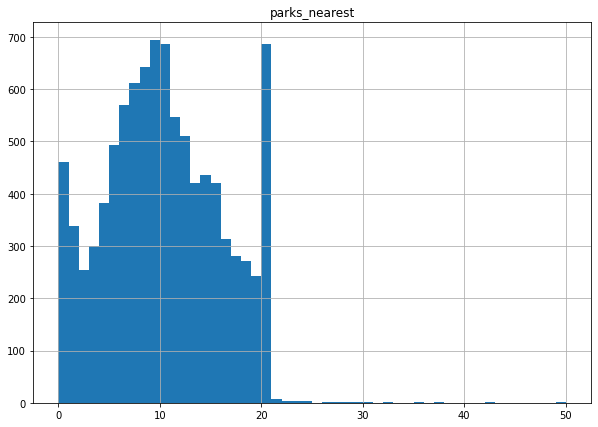

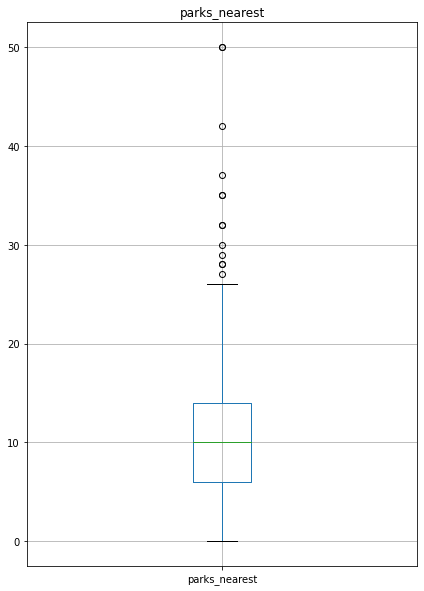

count    9591.000000
mean        9.967157
std         5.729373
min         0.000000
25%         6.000000
50%        10.000000
75%        14.000000
max        50.000000
Name: parks_nearest, dtype: float64
Размах "усов"  от: nan до: 26.00
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:0.05%


In [74]:
graph(data,'parks_nearest')

Удалим все выбросы со значениями более 26 м и со значением 0

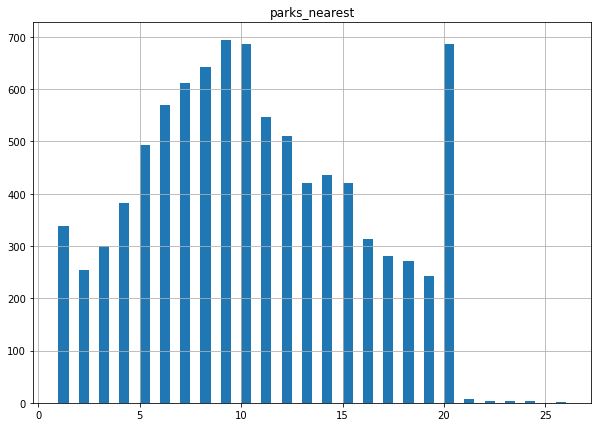

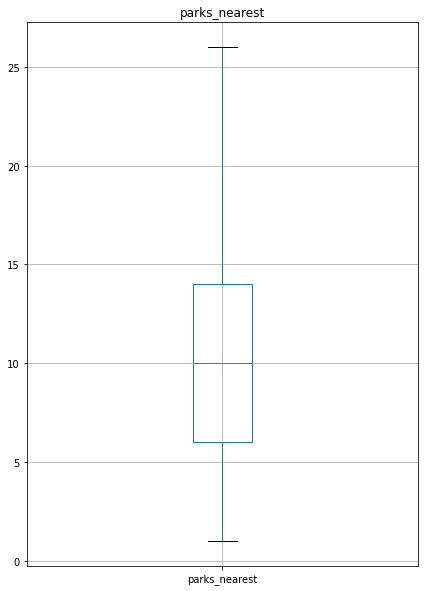

count    9117.000000
mean       10.435450
std         5.321099
min         1.000000
25%         6.000000
50%        10.000000
75%        14.000000
max        26.000000
Name: parks_nearest, dtype: float64
Размах "усов"  от: nan до: 26.00
Доля выбросов по нижней границе:0.00%
Доля выбросов по верхней границе:0.00%


In [75]:
drop_lines(data,'parks_nearest',1,26)

In [76]:
check(data)

Удалено: 7.60% от общей выборки


_________
**Вывод**

Были удалены единичные выбросы с растояниями до борков более 26 м и значения в 0 м, так как дома не могут располагаться непосредственно в парке. 

Видно, что среднее расстояние до парка около 10 м. На гистограмме наблюдается большое количество квартир с расстоянием до парков в 9, 10 и 20 м.
_____________________

#### Как быстро продавались квартиры?

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.


Постройте гистограмму.

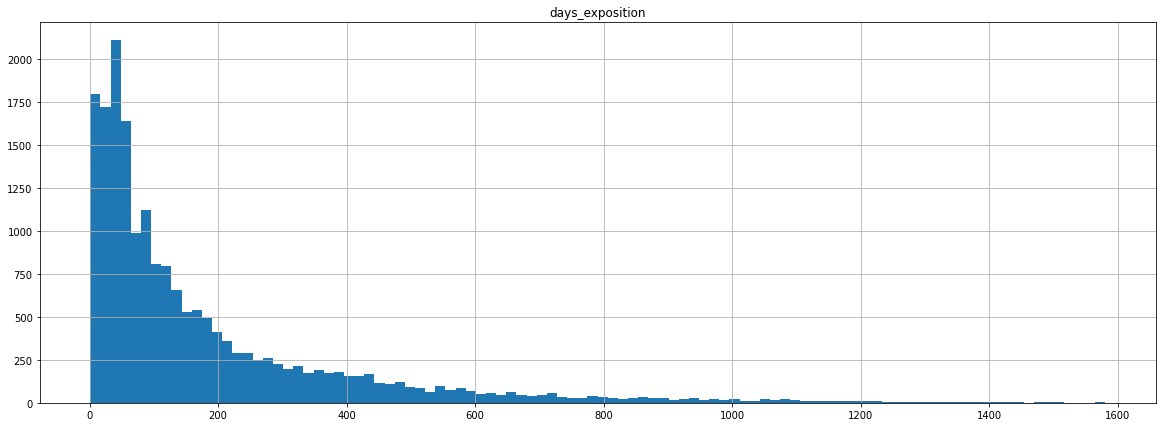

In [77]:
plt.figure(figsize=(20,7))
plt.title('days_exposition')
data['days_exposition'].hist(bins=100)
plt.show()

Посчитаем среднее и медиану.

In [78]:
data.agg({'days_exposition':['mean','median']}).round(0)

,days_exposition
mean,183.0
median,97.0


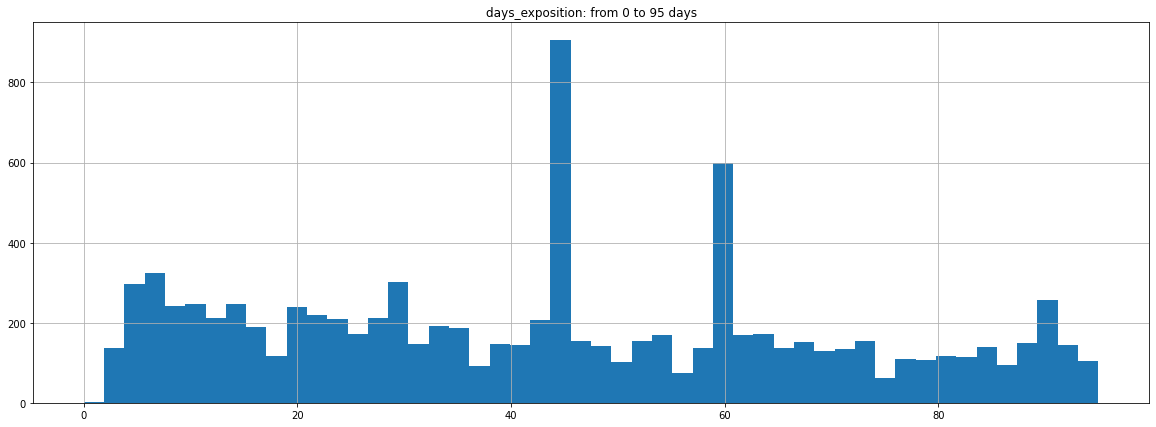

In [79]:
plt.figure(figsize=(20,7))
plt.title('days_exposition: from 0 to 95 days')
data['days_exposition'].hist(bins=50,range=(0,95))
plt.show()

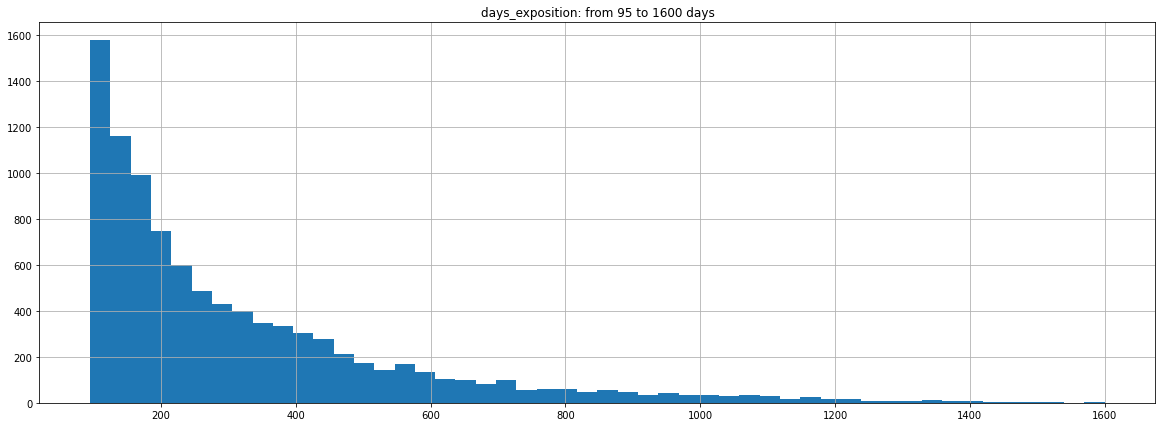

In [80]:
plt.figure(figsize=(20,7))
plt.title('days_exposition: from 95 to 1600 days')
data['days_exposition'].hist(bins=50,range=(95,1600))
plt.show()

____
**Вывод**

Чаще всего квартиры продаются в первые 95 дней после размещения объявления. Также максимумы наблюдаются в пределах 45-ого и 60-ого дней. 
Далее видно, что чем дольше "висит" объявление, тем меньше вероятность, что квартира будет продана.
___________

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучим, зависит ли цена от:
* общей площади - `total_area` 
* жилой площади - `living_area` 
* площади кухни - `kitchen_area` 
* количества комнат - `rooms`
* этажа, на котором расположена квартира (первый, последний, другой) - `floor_type`
* даты размещения (день недели, месяц, год) - `first_day_exposition`

Построим графики, которые покажут зависимость цены от указанных выше параметров. 

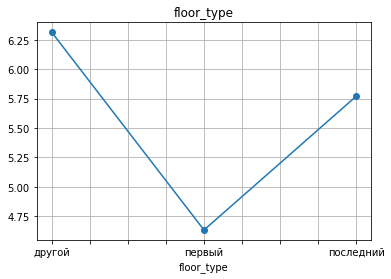

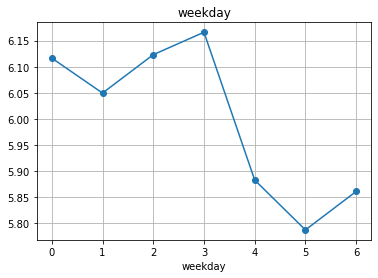

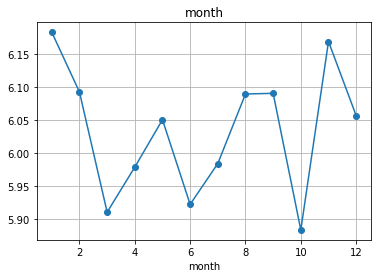

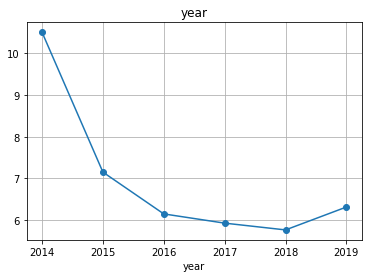

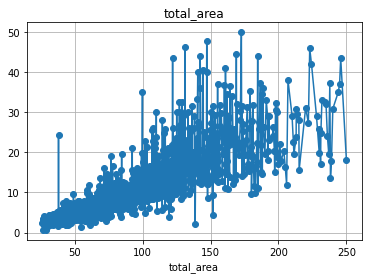

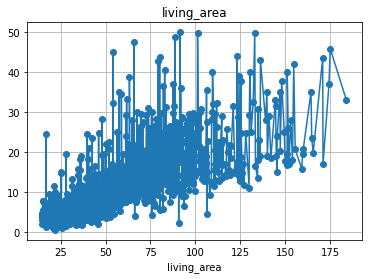

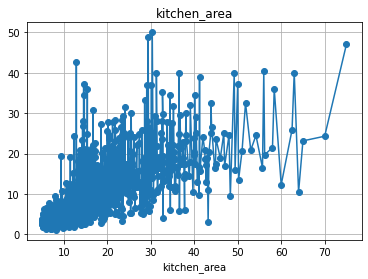

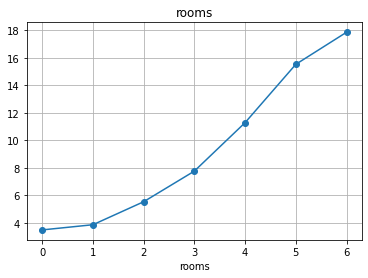

In [81]:
category_index=['floor_type','weekday','month','year','total_area','living_area','kitchen_area','rooms']
for t in category_index:
    data.pivot_table(index=t,aggfunc='mean')['last_price'].plot(style='-o', grid=True, title=t)
    plt.show()


Для количественных переменных рассчитаем коэффициент корреляции.

In [82]:
index=['last_price','floor_type','total_area','living_area','kitchen_area','rooms']
data[index].corr()['last_price']

last_price      1.000000
total_area      0.771276
living_area     0.671009
kitchen_area    0.618762
rooms           0.469632
Name: last_price, dtype: float64



______
**Вывод** 

* **Тип этажа** 

Самые дешевые квартиры на первом этаже, а самые дорогие на других этажах, кроме последнего

* **День недели** 

Дороже всего продаются квартиры в первой половине недели (с понедельника по четверг), дешевле всего во второй половине недели (с пятницы по воскресенье). Это можно связать с тем, что в выходные дни большинство людей откладывают решение по совершению сделки до начала рабочей недели и в эти дни падает спрос на покупку квартиры и соответственно уменьшается стоимость.

* **Месяц** 

Зависимость стоимости от месяца неоднозначная.

Самая высокая стоимость квартир наблюдается в январе и ноябре. Спад наблюдается от января к марту, от марта к маю наблюдается повышение цен. Далее небольшой спад и от июня к осени стоимость снова повышается. 
Повышение цен начиная с июля можно объяснить тем, что данный период в Санкт-Петербурге является популярным сезоном для туристов и посетителей. В это время город оживает, проводятся многочисленные мероприятия и фестивали. Повышенный туристический спрос может влиять на цены  квартир и приводить к их повышению.
Резкое падение цен в октябре может быть связано с локальными климатическими особенностями Санкт-Петербурга - в этот период наблюдаются наименее комфортные погодные условия.
Высокие цены в период с ноября по январь может быть объяснен тем, что многие люди предпочитают переезжать в это время года (например студенты выпустившееся из учебных заведений и люди желающие начать новую жизнь с нового года (???))

* **Год** 

Начиная с 2014 года стоимость квартир сильно падала, но в 2019 году резко выросла в среднем на 500тыс. руб. 

* **Общая площадь** 

Наибольшее значение коэффициента корреляции 0,77 - чем больше площадь, тем больше стоимость квартиры. 
Также положительная корреляция наблюдается у таких параметров как **Жилая площадь** (0,67) и **Площадь кухни** (0,61)

* **Количество комнат** 

По графику видна прямая линейная зависимость - чем больше комнат, тем больше стоимость квартиры, это подтверждает и положительный коэффициент корреляции (0,47) 

**Больше всего на стоимость квартиры влияют площади - общая, жилая и площадь кухни.**
___

#### Какие населённые пункты имеют самую высокую и низкую стоимость квадратного метра?
Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. 

In [83]:
last_price_pivot = data.pivot_table(index='locality_name', values=['sqm_price'],aggfunc=['count','mean'])
last_price_pivot.columns=['count','mean_sqm_price']
last_price_pivot = last_price_pivot.sort_values(by='count',ascending=False).head(10)
last_price_pivot.style.format({'mean_sqm_price': '{:.2f}'})

,count,mean_sqm_price
locality_name,,
Санкт-Петербург,14546,112168.03
Мурино,476,84034.86
Кудрово,410,94285.74
Шушары,383,77249.01
Всеволожск,375,68817.51
Пушкин,341,103559.65
Колпино,307,75409.62
Гатчина,299,69123.07
Парголово,269,88359.31


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [84]:
last_price_pivot.sort_values(by='mean_sqm_price',ascending=False).style.format({'mean_sqm_price': '{:.2f}'})

,count,mean_sqm_price
locality_name,,
Санкт-Петербург,14546,112168.03
Пушкин,341,103559.65
Кудрово,410,94285.74
Парголово,269,88359.31
Мурино,476,84034.86
Шушары,383,77249.01
Колпино,307,75409.62
Гатчина,299,69123.07
Всеволожск,375,68817.51


__________
**Вывод**

Самая высокая стоимость жилья, как и оказалось в черте города Санкт-Петербург. Чуть дешевле средняя стоимость квартир в Пушкине, как в самом популярном курортном направлении. Самые дешевые квартиры в городе Всеволожск, Гатчине и Выборге.
__________

#### Как стоимость объектов зависит от расстояния до центра города?

Ранее мы посчитали расстояние до центра в километрах. 

In [85]:
pd.set_option('display.max_columns', None)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_share,kitchen_area_share,sqm_price,weekday,month,year,floor_type,city_сenters_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,NaN,2.0,NaN,NaN,0.472222,0.231481,120370.37,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,7.0,0.0,7.0,81.0,0.460396,0.272277,82920.79,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,NaN,2.0,NaN,558.0,0.612500,0.148214,92785.71,3,8,2015,другой,14.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,NaN,1.0,NaN,121.0,0.320000,0.410000,100000.00,1,6,2018,другой,8.0
7,5,7.915,71.6,2019-04-18,2,NaN,24.0,40.437211,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,5.0,0.0,5.0,NaN,NaN,0.263966,110544.69,3,4,2019,другой,12.0


In [86]:
#Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену для каждого километра. 
spb = data.query('locality_name == "Санкт-Петербург" ')[['city_сenters_nearest_km','last_price']]
spb.reset_index(drop=True)
spb['mean_price_km'] = spb['last_price']/spb['city_сenters_nearest_km']
spb

,city_сenters_nearest_km,last_price,mean_price_km
0,16.0,13.000,0.812500
2,14.0,5.196,0.371143
4,8.0,10.000,1.250000
7,12.0,7.915,0.659583
9,15.0,5.400,0.360000
...,...,...,...
23689,16.0,3.550,0.221875
23690,6.0,5.500,0.916667
23691,4.0,9.470,2.367500
23694,4.0,9.700,2.425000


In [87]:
spb_pivot = spb.pivot_table(index='city_сenters_nearest_km',values='mean_price_km',aggfunc=['mean', 'median'])
spb_pivot

,mean,median
,mean_price_km,mean_price_km
city_сenters_nearest_km,,
0.0,inf,inf
1.0,12.608068,10.500000
2.0,6.096632,4.775000
3.0,3.377698,2.783333
4.0,2.752947,2.287500
5.0,2.337507,1.860000
6.0,1.968380,1.433333
7.0,1.658662,1.078571


<AxesSubplot:xlabel='city_сenters_nearest_km'>

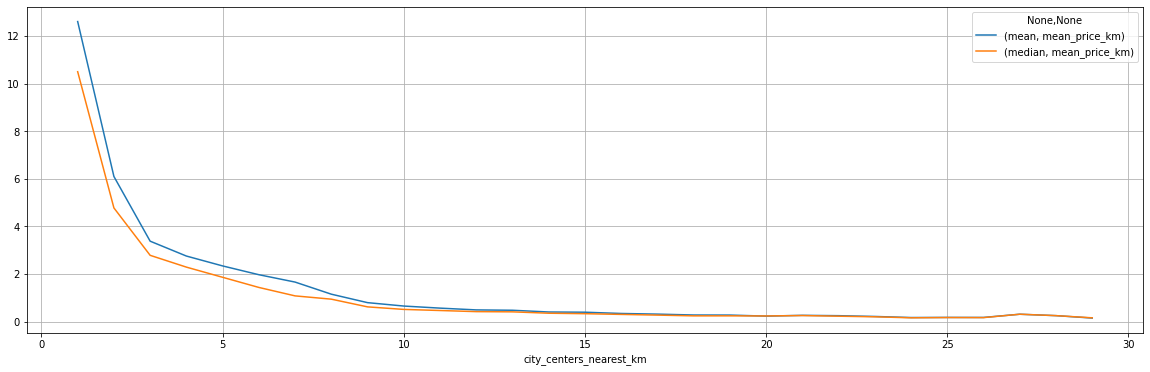

In [88]:
spb_pivot.plot(figsize=(20,6),grid=True)

<AxesSubplot:xlabel='city_сenters_nearest_km'>

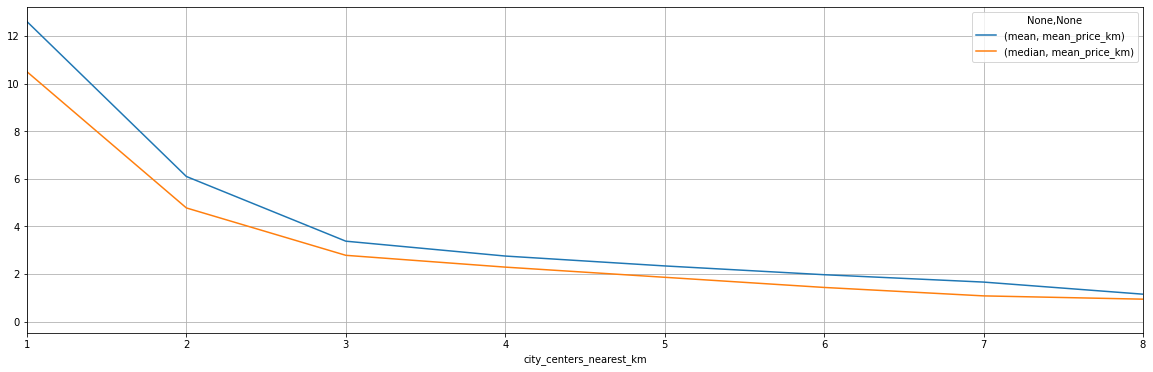

In [89]:
spb_pivot.plot(figsize=(20,6),xlim=(1,8), grid=True)


____________________________
**Вывод**

Стоимость квартир практически экспоненциально убывает при удалении от центра города, что логично, в центре квартиры гораздо дороже. При этом в первые 8 км от центра наблюдается наибольшее превышение средней стоимости километра от медианной.  
Это может быть связано с тем, что в центре есть здания исторического фонда и очень много элитного жилья, что сильно влияет на выборку и увеличивает среднюю стоимость.
_____________________

### Общий вывод <a id='results'></a>

**На этапе предобработки в данных были выявлены следующие проблемы:**
* Был переименован столбец с расстоянием до центра города (`city_centers_nearest`)
* Всего в данных было выявлено 101441 пропуск. 

Пропуски в столбцах `is_apartment`  и `balcony` были заменены на False и 0 соответственно. 
Для столбцов ` living_area`  и `kitchen_area` была посчитана средняя доля площади от общей площади, пропуски заменены этим значением, умноженным на общую площадь. 

Также были выявлены пропуски в картографических характеристиках. В столбцах `parks_nearest `  и  `ponds_nearest`  пропуски были заменены на 0, там, где было очевидно, что парков и водоемов в радиусе 3км нет. 

После заполнения пропусков осталось 67010 – было заменено более 33% пропусков. 



* Были изменены типы данных в столбцах `first_day_exposition`, `ponds_nearest` , `parks_nearest` и `balcony`.

* Были удалены неявные дубликаты в наименованиях населенных пунктов -  удалены все виды населенных пунктов. После замены было исправлено около 16% наименований. 

* Так же в датасет были добавлены новые столбцы: `sqm_price`, `weekday`, `month`, `year`, `floor_type`, `city_сenters_nearest_km`

**При исследовательском анализе было выявлено и удалено 7,6% строк с аномалиями и выбросами и выявлены следующие закономерности:**

*  Чаще всего квартиры продаются в районе 45 и 60 дней.


*  На общую (полную) стоимость объекта больше всего влияют такие характеристики объекта как общая площадь и площади кухни и жилого помещения. 
* Самая высокая стоимость квадратного метра в г. Санкт-Петербург и Пушкине.  Самые дешевые квартиры в  г. Всеволожск, Гатчине, и Выборге
* Чем ближе квартира к центру города, тем она дороже, при этом большое количество элитной недвижимости повышает среднее значение стоимости 1 километра над медианным. 

**Рекомендации для бизнеса**

1. Рекомендуется внедрить автоматизированную систему, которая учитывает среднее время продажи квартир в различных районах. Это позволит определить аномально долгие или быстрые продажи и выявить потенциальные случаи мошенничества.

2. При построении автоматизированной системы стоимости недвижимости рекомендуется внедрить модель, которая учитывает влияние общей площади, площади кухни и жилой площади на рыночную стоимость. Эти параметры могут быть ключевыми при определении цены объекта.

3. Зная, что стоимость квадратного метра самая высокая в некоторых районах, а самые дешевые квартиры находятся в других, рекомендуется внедрить систему, которая учитывает географические особенности при оценке цены недвижимости.

4. Рекомендуется учитывать расстояние до центра и наличие элитного жилья в системе оценки. Это поможет выявить аномалии в цене и потенциальные случаи переоценки.
